In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('../Dados/steam_reviews.csv')
df = pd.read_csv('../Dados/steam_reviews_lemmatization.csv')

### 434.891 reviews

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399085 entries, 0 to 399084
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date_posted             399085 non-null  object 
 1   funny                   399085 non-null  int64  
 2   helpful                 399085 non-null  int64  
 3   hour_played             399085 non-null  int64  
 4   is_early_access_review  399085 non-null  bool   
 5   recommendation          399085 non-null  object 
 6   review                  399085 non-null  object 
 7   title                   399085 non-null  object 
 8   polaridade              399085 non-null  float64
 9   review_len              399085 non-null  int64  
 10  word_count              399085 non-null  int64  
 11  no_contract             399085 non-null  object 
 12  rating_description_str  399085 non-null  object 
 13  tokenized               399085 non-null  object 
 14  lower               

### 48 games

In [4]:
df['title'].nunique()

48

In [5]:
df['title'].unique()

array(['Expansion - Hearts of Iron IV: Man the Guns', 'Dead by Daylight',
       'Wargroove', 'Wallpaper Engine', 'Factorio',
       'Insurgency: Sandstorm', 'Cold Waters', 'Tannenberg',
       'Pathfinder: Kingmaker', 'MONSTER HUNTER: WORLD',
       'Divinity: Original Sin 2 - Definitive Edition',
       'Football Manager 2019', "Garry's Mod", 'Survivor Pass: Vikendi',
       'Moonlighter', 'Terraria', 'GOD EATER 3',
       'Sid Meier’s Civilization® VI', 'Rocket League®',
       'Subnautica: Below Zero', "Tom Clancy's Rainbow Six® Siege",
       'ASTRONEER', 'Sid Meier’s Civilization® VI: Rise and Fall',
       'Kenshi', 'Euro Truck Simulator 2', 'Grand Theft Auto V',
       'RimWorld', 'NBA 2K19', 'RESIDENT EVIL 2 / BIOHAZARD RE:2',
       'Slay the Spire', 'My Time At Portia', 'Foundation', 'Beat Saber',
       "Sid Meier's Civilization® VI: Gathering Storm", 'Stardew Valley',
       'Farming Simulator 19', "PLAYERUNKNOWN'S BATTLEGROUNDS",
       'Overcooked! 2', "Don't Starve Toge

### 2010 - 2019

In [6]:
df.sort_values(by='date_posted')

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,polaridade,review_len,word_count,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
397142,2011-02-05,0,0,309,False,Recommended,One of the best LAN and Online multiplayer gam...,Left 4 Dead 2,1.000000,116,22,"['One', 'of', 'the', 'best', 'LAN', 'and', 'On...",One of the best LAN and Online multiplayer gam...,"['One', 'of', 'the', 'best', 'LAN', 'and', 'On...","['one', 'of', 'the', 'best', 'lan', 'and', 'on...","['one', 'of', 'the', 'best', 'lan', 'and', 'on...","['one', 'best', 'lan', 'online', 'multiplayer'...","[('one', 'CD'), ('best', 'JJS'), ('lan', 'NN')...","[('one', 'n'), ('best', 'a'), ('lan', 'n'), ('...","['one', 'best', 'lan', 'online', 'multiplayer'..."
39252,2011-05-31,0,0,109,False,Recommended,While similar to Minecraft this game is a whol...,Terraria,0.169697,221,40,"['While', 'similar', 'to', 'Minecraft', 'this'...",While similar to Minecraft this game is a whol...,"['While', 'similar', 'to', 'Minecraft', 'this'...","['while', 'similar', 'to', 'minecraft', 'this'...","['while', 'similar', 'to', 'minecraft', 'this'...","['similar', 'minecraft', 'game', 'whole', 'lot...","[('similar', 'JJ'), ('minecraft', 'NN'), ('gam...","[('similar', 'a'), ('minecraft', 'n'), ('game'...","['similar', 'minecraft', 'game', 'whole', 'lot..."
39235,2011-06-05,0,0,16,False,Recommended,Great fun game just to mess around with.Very A...,Terraria,0.131250,55,9,"['Great', 'fun', 'game', 'just', 'to', 'mess',...",Great fun game just to mess around with.Very A...,"['Great', 'fun', 'game', 'just', 'to', 'mess',...","['great', 'fun', 'game', 'just', 'to', 'mess',...","['great', 'fun', 'game', 'just', 'to', 'mess',...","['great', 'fun', 'game', 'mess', 'around', 'wi...","[('great', 'JJ'), ('fun', 'JJ'), ('game', 'NN'...","[('great', 'a'), ('fun', 'a'), ('game', 'n'), ...","['great', 'fun', 'game', 'mess', 'around', 'wi..."
39337,2011-06-15,0,0,12,False,Recommended,2D Minecraft is the lazy way to describe it bu...,Terraria,0.160714,206,41,"['2D', 'Minecraft', 'is', 'the', 'lazy', 'way'...",2D Minecraft is the lazy way to describe it bu...,"['2D', 'Minecraft', 'is', 'the', 'lazy', 'way'...","['2d', 'minecraft', 'is', 'the', 'lazy', 'way'...","['2d', 'minecraft', 'is', 'the', 'lazy', 'way'...","['2d', 'minecraft', 'lazy', 'way', 'describe',...","[('2d', 'CD'), ('minecraft', 'NN'), ('lazy', '...","[('2d', 'n'), ('minecraft', 'n'), ('lazy', 'a'...","['2d', 'minecraft', 'lazy', 'way', 'describe',..."
39311,2011-07-02,0,0,418,False,Recommended,Dig dig dig must dig non stop forever.,Terraria,0.000000,38,8,"['Dig', 'dig', 'dig', 'must', 'dig', 'non', 's...",Dig dig dig must dig non stop forever.,"['Dig', 'dig', 'dig', 'must', 'dig', 'non', 's...","['dig', 'dig', 'dig', 'must', 'dig', 'non', 's...","['dig', 'dig', 'dig', 'must', 'dig', 'non', 's...","['dig', 'dig', 'dig', 'must', 'dig', 'non', 's...","[('dig', 'NN'), ('dig', 'NN'), ('dig', 'NN'), ...","[('dig', 'n'), ('dig', 'n'), ('dig', 'n'), ('m...","['dig', 'dig', 'dig', 'must', 'dig', 'non', 's..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330197,2019-02-16,0,0,40,False,Recommended,This game is great. Its even better than 7. It...,RESIDENT EVIL 2 / BIOHAZARD RE:2,0.318095,128,25,"['This', 'game', 'is', 'great.', 'Its', 'even'...",This game is great. Its even better than 7. It...,"['This', 'game', 'is', 'great', '.', 'Its', 'e...","['this', 'game', 'is', 'great', '.', 'its', 'e...","['this', 'game', 'is', 'great', 'its', 'even',...","['game', 'great', 'even', 'better', '7', 'sati...","[('game', 'NN'), ('great', 'JJ'), ('even', 'RB...","[('game', 'n'), ('great', 'a'), ('even', 'r'),...","['game', 'great', 'even', 'well', '7', 'satisf..."
330196,2019-02-16,0,0,1,False,Recommended,I've fallen for this game and their name is RE2!,RESIDENT EVIL 2 / BIOHAZARD RE:2,-0.500000,48,10,"['I have', 'fallen', 'for', 'this', '

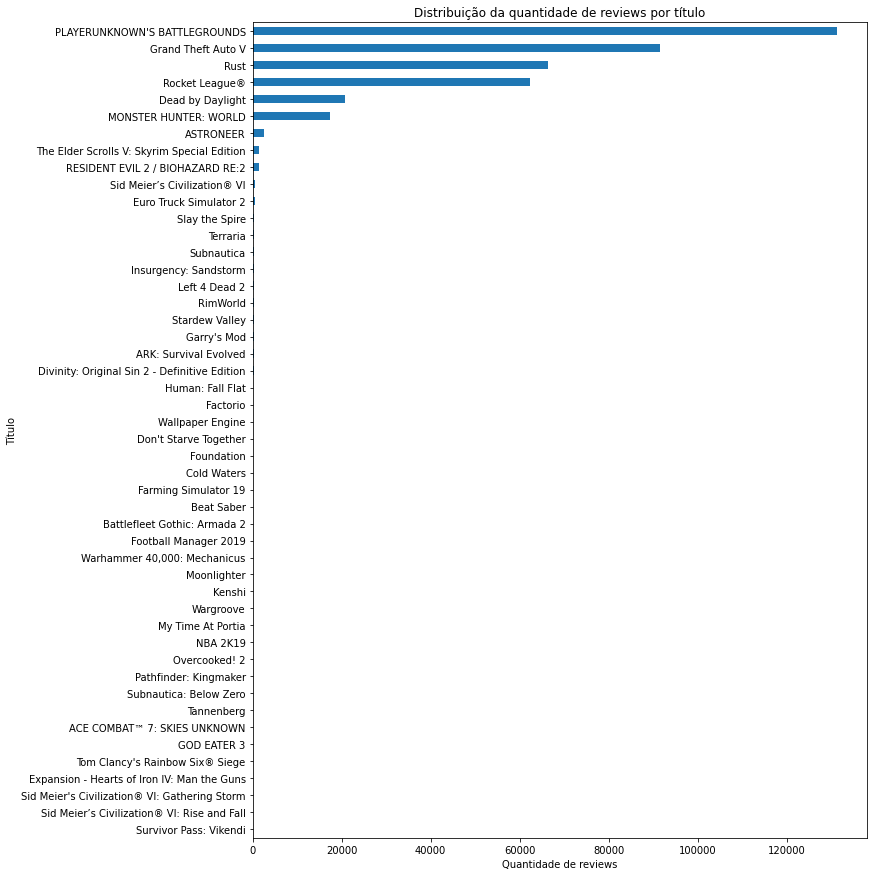

In [7]:
import matplotlib.pyplot as plt

# Agrupa o dataset por título e conta a quantidade de reviews
review_counts = df.groupby("title")["review"].count()

# Ordena os valores pela quantidade de reviews em ordem decrescente
review_counts = review_counts.sort_values(ascending=True)

# Cria um gráfico de barras horizontais com tamanho aumentado
fig, ax = plt.subplots(figsize=(11, 15))
review_counts.plot(kind="barh", ax=ax)

# Adiciona um título e rótulos de eixo
ax.set_title("Distribuição da quantidade de reviews por título")
ax.set_xlabel("Quantidade de reviews")
ax.set_ylabel("Título")

# Exibe o gráfico
plt.show()

In [8]:
review_counts.describe()

count        48.000000
mean       8314.270833
std       25832.627085
min           3.000000
25%          10.000000
50%         153.500000
75%         248.500000
max      131407.000000
Name: review, dtype: float64

In [9]:
print(review_counts.to_list())

[3, 3, 3, 3, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 149, 158, 160, 165, 181, 187, 194, 198, 199, 199, 209, 243, 248, 250, 464, 515, 1310, 1439, 2607, 17428, 20702, 62406, 66381, 91486, 131407]


In [ ]:
df.loc[df['hour_played'] == 0]

## Separar os 3 grupos, 3-10 reviews, 11-9.999, 10.000+

In [10]:
df['group'] = -1
for jogo, qntd in review_counts.iteritems():
    label = 0
    if qntd > 10000:
        label = 2
    elif qntd > 10:
        label = 1
    df.loc[df['title'] == jogo, 'group'] = label


In [11]:
df.loc[df['group'] == 2]['title'].unique()

array(['Dead by Daylight', 'MONSTER HUNTER: WORLD', 'Rocket League®',
       'Grand Theft Auto V', "PLAYERUNKNOWN'S BATTLEGROUNDS", 'Rust'],
      dtype=object)

In [14]:
df.loc[df['group'] == 0]

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,polaridade,review_len,...,no_contract,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,group
0,2019-02-10,2,4,578,False,Recommended,Played as German Reich Declare war on Belgium...,Expansion - Hearts of Iron IV: Man the Guns,-0.016667,180,...,"['Played', 'as', 'German', 'Reich', 'Declare',...",Played as German Reich Declare war on Belgium ...,"['Played', 'as', 'German', 'Reich', 'Declare',...","['played', 'as', 'german', 'reich', 'declare',...","['played', 'as', 'german', 'reich', 'declare',...","['played', 'german', 'reich', 'declare', 'war'...","[('played', 'JJ'), ('german', 'JJ'), ('reich',...","[('played', 'a'), ('german', 'a'), ('reich', '...","['played', 'german', 'reich', 'declare', 'war'...",0
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns,0.000000,4,...,['yes.'],yes.,"['yes', '.']","['yes', '.']",['yes'],['yes'],"[('yes', 'NNS')]","[('yes', 'n')]",['yes'],0
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,0.162000,171,...,"['Very', 'good', 'game', 'although', 'a', 'bit...",Very good game although a bit overpriced in my...,"['Very', 'good', 'game', 'although', 'a', 'bit...","['very', 'good', 'game', 'although', 'a', 'bit...","['very', 'good', 'game', 'although', 'a', 'bit...","['good', 'game', 'although', 'bit', 'overprice...","[('good', 'JJ'), ('game', 'NN'), ('although', ...","[('good', 'a'), ('game', 'n'), ('although', 'n...","['good', 'game', 'although', 'bit', 'overprice...",0
20705,2019-02-02,89,536,11,False,Recommended,It's like Advance Wars with a coat of Fire Emb...,Wargroove,-0.300000,161,...,"['It is', 'like', 'Advance', 'Wars', 'with', '...",It is like Advance Wars with a coat of Fire Em...,"['It', 'is', 'like', 'Advance', 'Wars', 'with'...","['it', 'is', 'like', 'advance', 'wars', 'with'...","['it', 'is', 'like', 'advance', 'wars', 'with'...","['like', 'advance', 'wars', 'coat', 'fire', 'e...","[('like', 'IN'), ('advance', 'NN'), ('wars', '...","[('like', 'n'), ('advance', 'n'), ('wars', 'n'...","['like', 'advance', 'war', 'coat', 'fire', 'em...",0
20706,2019-02-01,5,154,121,False,Recommended,I played Advance Wars religiously for many man...,Wargroove,0.317250,474,...,"['I', 'played', 'Advance', 'Wars', 'religiousl...",I played Advance Wars religiously for many man...,"['I', 'played', 'Advance', 'Wars', 'religiousl...","['i', 'played', 'advance', 'wars', 'religiousl...","['i', 'played', 'advance', 'wars', 'religiousl...","['played', 'advance', 'wars', 'religiously', '...","[('played', 'VBN'), ('advance', 'NN'), ('wars'...","[('played', 'v'), ('advance', 'n'), ('wars', '...","['play', 'advance', 'war', 'religiously', 'man...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399080,2018-11-17,1,37,10,False,Recommended,YOUR FLESH WILL ROT AND DECAY.STEEL IS IMMORTA...,"Warhammer 40,000: Mechanicus",-0.034908,1977,...,"['YOUR', 'FLESH', 'WILL', 'ROT', 'AND', 'DECAY...",YOUR FLESH WILL ROT AND DECAY.STEEL IS IMMORTA...,"['YOUR', 'FLESH', 'WILL', 'ROT', 'AND', 'DECAY...","['your', 'flesh', 'will', 'rot', 'and', 'decay...","['your', 'flesh', 'will', 'rot', 'and', 'decay...","['flesh', 'rot', 'decay.steel', 'immortal.for'...","[('flesh', 'JJ'), ('rot', 'NN'), ('decay.steel...","[('flesh', 'a'), ('rot', 'n'), ('decay.steel',...","['flesh', 'rot', 'decay.steel', 'immortal.for'...",0
399081,2018-11-17,3,41,38,False,Recommended,Domini and Dominae I believe what we are deali...,"Warhammer 40,000: Mechanicus",0.069079,2532,...,"['Domini', 'and', 'Dominae', 'I', 'believe', '...",Domini and Dominae I believe what we are deali...,"['Domini', 'and', 'Dominae', 'I', 'believe', '...","['domini', 'and', 'dominae', 'i', 'believe', '...","['domini', 'and', 'dominae', 'i', 'believe', '...","['domini', 'dominae', 'believe', 'dealing

In [15]:
df['hour_played_norm'] = df.groupby('title')['hour_played'].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [16]:
df.loc[df['title'] == 'Expansion - Hearts of Iron IV: Man the Guns']

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,polaridade,review_len,...,rating_description_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,group,hour_played_norm
0,2019-02-10,2,4,578,False,Recommended,Played as German Reich Declare war on Belgium...,Expansion - Hearts of Iron IV: Man the Guns,-0.016667,180,...,Played as German Reich Declare war on Belgium ...,"['Played', 'as', 'German', 'Reich', 'Declare',...","['played', 'as', 'german', 'reich', 'declare',...","['played', 'as', 'german', 'reich', 'declare',...","['played', 'german', 'reich', 'declare', 'war'...","[('played', 'JJ'), ('german', 'JJ'), ('reich',...","[('played', 'a'), ('german', 'a'), ('reich', '...","['played', 'german', 'reich', 'declare', 'war'...",0,0.556497
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns,0.000000,4,...,yes.,"['yes', '.']","['yes', '.']",['yes'],['yes'],"[('yes', 'NNS')]","[('yes', 'n')]",['yes'],0,0.000000
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,0.162000,171,...,Very good game although a bit overpriced in my...,"['Very', 'good', 'game', 'although', 'a', 'bit...","['very', 'good', 'game', 'although', 'a', 'bit...","['very', 'good', 'game', 'although', 'a', 'bit...","['good', 'game', 'although', 'bit', 'overprice...","[('good', 'JJ'), ('game', 'NN'), ('although', ...","[('good', 'a'), ('game', 'n'), ('although', 'n...","['good', 'game', 'although', 'bit', 'overprice...",0,1.000000


In [17]:
df['recommendation'].unique()

array(['Recommended', 'Not Recommended'], dtype=object)

<AxesSubplot:xlabel='group', ylabel='hour_played_norm'>

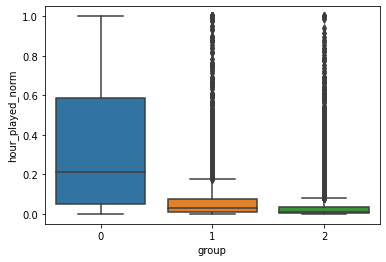

In [18]:
import seaborn as sns

sns.boxplot(x="group", y="hour_played_norm", data=df)

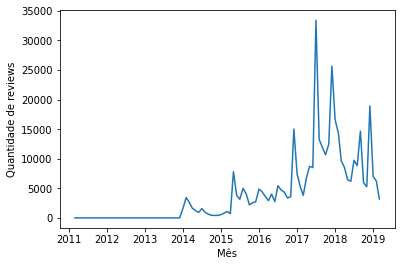

In [19]:
# convertendo a coluna date_posted para datetime e definindo como índice
df['date_posted'] = pd.to_datetime(df['date_posted'])
df = df.set_index('date_posted')

# agrupando por mês e contando a quantidade de reviews
reviews_por_mes = df.resample('M').count()['review']

# plotando o gráfico
plt.plot(reviews_por_mes.index, reviews_por_mes.values)
plt.xlabel('Mês')
plt.ylabel('Quantidade de reviews')
plt.show()

In [20]:
df_g0 = df.loc[df['group'] == 0]
df_g1 = df.loc[df['group'] == 1]
df_g2 = df.loc[df['group'] == 2]

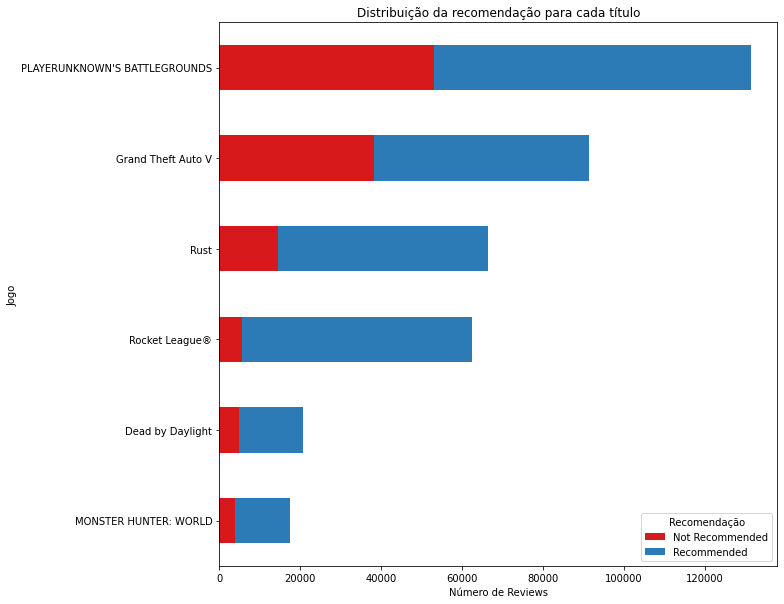

In [25]:
# Agrupar por título e recomendação
grouped = df_g2.groupby(['title', 'recommendation']).size().unstack(fill_value=0)

# Ordenar pelos títulos com mais reviews
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=True).index]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 10))
grouped.plot(kind='barh', stacked=True, ax=ax, color=['#d7191c', '#2c7bb6'])

# Configurar o gráfico
ax.set_xlabel('Número de Reviews')
ax.set_ylabel('Jogo')
ax.set_title('Distribuição da recomendação para cada título')
ax.legend(title='Recomendação', loc='lower right')

# Mostrar o gráfico
plt.show()

In [ ]:
df.corr()

In [ ]:
# Criar o gráfico de dispersão
plt.scatter(df['hour_played'], df['recommendation'])

# Configurar o gráfico
plt.xlabel('Horas Jogadas')
plt.ylabel('Recomendação')
plt.title('Correlação entre horas jogadas e recomendação')

# Mostrar o gráfico
plt.show()

In [ ]:
# Importar o seaborn para criar o gráfico de caixa
import seaborn as sns

# Criar o gráfico de caixa
sns.boxplot(x='recommendation', y='hour_played', data=df)

# Configurar o gráfico
plt.xlabel('Recomendação')
plt.ylabel('Horas Jogadas')
plt.title('Distribuição das horas jogadas por recomendação')

# Mostrar o gráfico
plt.show()